The dataset used can be downloaded from [here](https://ai.google.com/research/ConceptualCaptions/download)

In [ ]:
# i = []
# while True:
#   i.append('AWdjdnksdkcn'*1003939489321)

In [ ]:
from pathlib import Path
import os
from google.colab import drive

In [ ]:
def create_path(path):
  if not os.path.isdir(path):
    path.mkdir(parents=True, exist_ok=True)
  return path

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
root_dir = Path('/content/gdrive/My Drive')
base_path = create_path(root_dir/'Image_Captioning')
base_path

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


PosixPath('/content/gdrive/My Drive/Image_Captioning')

In [ ]:
data_path = create_path(base_path/'dataset')
data_path

PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset')

In [ ]:
model_path = create_path(base_path/'models')
model_path

PosixPath('/content/gdrive/My Drive/Image_Captioning/models')

In [ ]:
image_path = create_path(base_path/'images')
image_path

PosixPath('/content/gdrive/My Drive/Image_Captioning/images')

In [ ]:
# os.chdir(data_path)
# ! wget http://cs.stanford.edu/people/karpathy/deepimagesent/caption_datasets.zip

In [ ]:
! wget 'https://storage.googleapis.com/kaggle-data-sets/159035/364443/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585234255&Signature=aJH2YLE5NDZWTHRl4P9zppbchB3Y5wTotDPioPneD7Ujb93akW7i5UwWfavEoB9ULnlP72K15dQyzk5q6GXm0icveV5wyCt1rETebsuZMZgACkGb6qpTSnV8I1PjfgzcqIcLRfKV9qyksiOares8oE7egR%2FArtBG1TlcRHhpYWaSxIHUM8wDUBwzCIGzv3vlawmKS3TxncKNoFtg3pbycj3PvD0hB6VUEjGAQQgZvgxqPUB729Ir6g5B2JuX30nns6D5KBagXXKks8NmZJlspK%2BthW5QBG7d%2FmurjCRr9ASg%2BhFcPxF9eq3zUTRUFGO5bBJSncKlCTKOpRVjxlcGzA%3D%3D&response-content-disposition=attachment%3B+filename%3Dflicker8k-dataset.zip'

The name is too long, 523 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585234255&Signature=aJH2YLE5NDZWTHRl4P9zppbchB3Y5wTotDPioPneD7Ujb93akW7i5UwWfavEoB9ULnlP72K15dQyzk5q6GXm0icveV5wyCt1rETebsuZMZgACkGb6qpTSnV8I1PjfgzcqIcLR.
--2020-03-23 21:09:40--  https://storage.googleapis.com/kaggle-data-sets/159035/364443/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585234255&Signature=aJH2YLE5NDZWTHRl4P9zppbchB3Y5wTotDPioPneD7Ujb93akW7i5UwWfavEoB9ULnlP72K15dQyzk5q6GXm0icveV5wyCt1rETebsuZMZgACkGb6qpTSnV8I1PjfgzcqIcLRfKV9qyksiOares8oE7egR%2FArtBG1TlcRHhpYWaSxIHUM8wDUBwzCIGzv3vlawmKS3TxncKNoFtg3pbycj3PvD0hB6VUEjGAQQgZvgxqPUB729Ir6g5B2JuX30nns6D5KBagXXKks8NmZJlspK%2BthW5QBG7d%2FmurjCRr9ASg%2BhFcPxF9eq3zUTRUFGO5bBJSncKlCTKOpRVjxlcGzA%3D%3D&response-content-disposition=attachment%3B+filename%3Dflicker8k-dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)...

In [ ]:
! unzip -q '/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585234255&Signature=aJH2YLE5NDZWTHRl4P9zppbchB3Y5wTotDPioPneD7Ujb93akW7i5UwWfavEoB9ULnlP72K15dQyzk5q6GXm0icveV5wyCt1rETebsuZMZgACkGb6qpTSnV8I1PjfgzcqIcLR'

Import some awesome stuff

In [ ]:
from fastai import *
from fastai.text import *
from fastai.vision import *
import pandas as pd
from PIL import Image

In [ ]:
train = pd.read_csv('/content/Flickr8k_text/Flickr_8k.trainImages.txt', sep='\t', header=None).values.flatten().tolist()
valid = pd.read_csv('/content/Flickr8k_text/Flickr_8k.devImages.txt', sep='\t', header=None).values.flatten().tolist()
test = pd.read_csv('/content/Flickr8k_text/Flickr_8k.testImages.txt', sep='\t', header=None).values.flatten().tolist()

In [ ]:
data = pd.read_csv('/content/Flickr8k_text/Flickr8k.token.txt', sep='\t', header=None)
data[0] = data[0].map(lambda x: re.findall(r"^\w+.jpg", x)[0])

train_fn_caps, valid_fn_caps, test_fn_caps = [], [], []
images, all_caps = [], []
for img, caps in data.groupby(0):
  if img in train:
    caps = pd.DataFrame(caps[1]).values.flatten().tolist()
    train_fn_caps.append((img, caps))

  elif img in valid:
    caps = pd.DataFrame(caps[1]).values.flatten().tolist()
    valid_fn_caps.append((img, caps))

  elif img in test:
    caps = pd.DataFrame(caps[1]).values.flatten().tolist()
    test_fn_caps.append((img, caps))

train_fn_caps[0]

('1000268201_693b08cb0e.jpg',
 ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'])

In [ ]:
len(train_fn_caps), len(valid_fn_caps), len(test_fn_caps)

(6000, 1000, 1000)

In [ ]:
test_fn_caps[5]

('1107246521_d16a476380.jpg',
 ['a black dog jumping to catch a rope toy',
  'A black dog playing fetch with a ball of rope .',
  'A black dog pounces to get a rope toy .',
  'A black dog running after his rope toy .',
  'A large black dog is playing in a grassy yard .'])

In [ ]:
data_path.ls()

[PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/dataset_flickr8k.json'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/dataset_flickr30k.json'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/dataset_coco.json'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/aqAGt.pkl.1'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/aqAGt.pkl'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/AVCOT.pkl'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/nUe0o.pkl')]

In [ ]:
# ! unzip *.zip
# ! rm *.zip

Archive:  caption_datasets.zip
  inflating: dataset_coco.json       
  inflating: dataset_flickr30k.json  
  inflating: dataset_flickr8k.json   


In [ ]:
json_data = json.load((data_path/'dataset_coco.json').open())

The entire data is split into train/restval, text and val sets

In [ ]:
data = [d for d in json_data['images']]

In [ ]:
# data[1]

Let's look at the different captions generated for the first item in the `data_json` file

In [ ]:
data[1]['filename']

'COCO_val2014_000000522418.jpg'

In [ ]:
data[1]['sentences'][0]

{'imgid': 1,
 'raw': 'A woman wearing a net on her head cutting a cake. ',
 'sentid': 681330,
 'tokens': ['a',
  'woman',
  'wearing',
  'a',
  'net',
  'on',
  'her',
  'head',
  'cutting',
  'a',
  'cake']}

In [ ]:
[data[1]['sentences'][i]['raw'] for i, val in enumerate(data[1]['sentences'])]

['A woman wearing a net on her head cutting a cake. ',
 'A woman cutting a large white sheet cake.',
 'A woman wearing a hair net cutting a large sheet cake.',
 'there is a woman that is cutting a white cake',
 "A woman marking a cake with the back of a chef's knife. "]

Show the unique values in the split key in json_data

In [ ]:
np.unique([y['split'] for y in data])

array(['restval', 'test', 'train', 'val'], dtype='<U7')

Load up the traiing and valid sets

the train data should be where the split key has values of either `train` or `restval`

In [ ]:
train_data = [y for y in data if y['split'] in {'train', 'restval'}]

the valid_data should be where the split key has values equal to `valid`

In [ ]:
valid_data = [y for y in data if y['split'] == 'val']

the test_data should be where the split key has values equal to `test`

In [ ]:
test_data = [y for y in data if y['split'] == 'test']

We can create a tuple for every item in each of the train, valid and test data which contains the path to the image using the `filepath` and `filename` keys of the individual data dicts and also the diffent captions for that particular image under the `raw` key for that particular data dict

In [ ]:
train_fn_caps = [(item['filepath'] +'/'+ item['filename'], #child
  list(item_sentence['raw'] for item_sentence in item['sentences'])) #child
    for item in train_data] #parent

valid_fn_caps = [(item['filepath'] +'/'+ item['filename'], #child
  list(item_sentence['raw'] for item_sentence in item['sentences'])) #child
    for item in valid_data] #parent

test_fn_caps = [(item['filepath'] +'/'+ item['filename'], #child
  list(item_sentence['raw'] for item_sentence in item['sentences'])) #child
    for item in test_data] #parent

# show the tuple containing the file path and captions
train_fn_caps[0]

('val2014/COCO_val2014_000000522418.jpg',
 ['A woman wearing a net on her head cutting a cake. ',
  'A woman cutting a large white sheet cake.',
  'A woman wearing a hair net cutting a large sheet cake.',
  'there is a woman that is cutting a white cake',
  "A woman marking a cake with the back of a chef's knife. "])

We have to tokeninze all the captions from the `train_fn_caps` list. We are hiping that al the words here also appear in the train and the test sets.

We first of all slice out the individaul captions lists out of the tuple we have then we use `itertools` to chain the individual lists together such as to get a single list containing all the captions for all the images

In [ ]:
all_captions = list(itertools.chain.from_iterable(list(zip(*train_fn_caps))[1]))
all_captions[:10]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .',
 'A black dog and a spotted dog are fighting',
 'A black dog and a tri-colored dog playing with each other on the road .',
 'A black dog and a white dog with brown spots are staring at each other in the street .',
 'Two dogs of different breeds looking at each other on the road .',
 'Two dogs on pavement moving toward each other .']

In [ ]:
tokenizer = Tokenizer(n_cpus=1)

In [ ]:
len(train_fn_caps)

6000

In [ ]:
%time train_caption_tokens = tokenizer.process_all(all_captions)

CPU times: user 1.98 s, sys: 11.7 ms, total: 1.99 s
Wall time: 2 s


Let's amke a vocab dict out of the tokens using the `create` method from FastAi's `Vocab` class.
The train tokens will be used to make the vocab because we are going to assume that every token that exists in the valid set is also in the training set

In [ ]:
vocab = Vocab.create(train_caption_tokens, max_vocab=60000, min_freq=2)

In [ ]:
vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'a']

save this vocab as a binary file so we won't have to create it again (especially that tokenizer step)

In [ ]:
pickle.dump(vocab, open(model_path/'vocab_flickr.pkl', 'wb'))

In [ ]:
vocab = pickle.load(open(model_path/'vocab_flickr.pkl', 'rb'))

In [ ]:
vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'a']

Let's test to see that everything works fine

In [ ]:
idx = 1000

In [ ]:
train_caption_tokens[idx]

['a',
 'crowd',
 'of',
 'people',
 'are',
 'standing',
 'together',
 'on',
 'a',
 'sidewalk',
 ',',
 'while',
 'one',
 'man',
 'is',
 'taking',
 'a',
 'picture',
 '.']

In [ ]:
vocab.numericalize(train_caption_tokens[idx])

[9, 135, 19, 31, 24, 47, 151, 13, 9, 169, 27, 44, 67, 18, 14, 258, 9, 154, 10]

In [ ]:
vocab.textify(vocab.numericalize(train_caption_tokens[idx]))

'a crowd of people are standing together on a sidewalk , while one man is taking a picture .'

It works!!

Let's create a function that will numericalize all the tokens in each of the sentences in the training and validation corpus. 
When working with sequence models, you always add a pad to the sentence depending on the architecture being used. Our architecture requires us to add a 'xxpad' tooken at the end of the sentence so we select the right key for that token from the vocab and append it to the existing sentence tokens

In [ ]:
def numericalizer(t):
  if t is None:
    raise Exception('Please put a training or validation corpus')
  return np.array([vocab.numericalize(c)+[1] for c in t])

We want to map every filepath from the tuple to it's corresponding numericalized(hence tokenized) caption. We have to create a helper method

In [ ]:
# list(map(lambda x: base_path/x, list(zip(*train_fn_caps))[0]))[0]

In [ ]:
data_path.ls()

[PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/dataset_coco.json'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/dataset_flickr30k.json'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/dataset/dataset_flickr8k.json')]

In [ ]:
def filecap_mapper(path, fn_caps, name):
  '''take a fn_caps tuple and extract the paths and numericalize each 
  caption then pickle dump'''
  data_path = Path('/content/Flickr8k_Dataset/Flicker8k_Dataset')
  filenames, captions = list(zip(*fn_caps))
  filename = list(map(lambda x: data_path/x, filenames))

  print('Started...')
  # for c in captions:
  #   fn_captions_list.append(numericalizer(tokenizer.process_all(c)))
  fn_captions_list = list(map(lambda x: numericalizer(tokenizer.process_all(x)), 
                              list(zip(*fn_caps))[1]))
  print('Done...')
  dataset = (filename, fn_captions_list)

  # dump it as a pkl
  pickle.dump(dataset, open(f'{path/name}.pkl', 'wb'))
  print('All Done...')
  

In [ ]:
# %time filecap_mapper(model_path, train_fn_caps, 'train_dataset')
# %time filecap_mapper(model_path, valid_fn_caps, 'valid_dataset')
# filecap_mapper(model_path, test_fn_caps, 'test_dataset')

In [ ]:
model_path.ls()

In [ ]:
# %time filecap_mapper(model_path, train_fn_caps, 'train_dataset_flickr')
# %time filecap_mapper(model_path, valid_fn_caps, 'valid_dataset_flickr')
# %time filecap_mapper(model_path, test_fn_caps, 'test_dataset_flickr')

Started...
Done...
All Done...
CPU times: user 2min 39s, sys: 60.4 ms, total: 2min 39s
Wall time: 2min 39s


In [ ]:
model_path.ls()

[PosixPath('/content/gdrive/My Drive/Image_Captioning/models/vocab_coco.pkl'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/models/train_dataset.pkl'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/models/valid_dataset.pkl'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/models/vocab_flickr.pkl'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/models/train_dataset_flickr.pkl'),
 PosixPath('/content/gdrive/My Drive/Image_Captioning/models/valid_dataset_flickr.pkl')]

In [ ]:
# train_data = pickle.load((model_path/"train_dataset.pkl").open('rb'))
# valid_data = pickle.load((model_path/"valid_dataset.pkl").open('rb'))
# # test_data  = pickle.load((model_path/"test_dataset.pkl").open('rb'))

In [ ]:
train_data = pickle.load((model_path/"train_dataset_flickr.pkl").open('rb'))
valid_data = pickle.load((model_path/"valid_dataset_flickr.pkl").open('rb'))
test_data  = pickle.load((model_path/"test_dataset_flickr.pkl").open('rb'))

In [ ]:
vocab.textify(list(zip(*train_data))[0][1][2])

'a little girl climbing into a wooden playhouse . xxpad'

It works!!

In [ ]:
list(zip(*train_data))[0]

(PosixPath('/content/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'),
 array([list([9, 51, 11, 9, 97, 181, 14, 126, 61, 9, 400, 19, 407, 11, 36, 0, 639, 10, 1]),
        list([9, 26, 326, 74, 9, 206, 129, 10, 1]), list([9, 48, 26, 126, 74, 9, 206, 2089, 10, 1]),
        list([9, 48, 26, 126, 12, 407, 28, 69, 2089, 10, 1]),
        list([9, 48, 26, 11, 9, 97, 181, 326, 74, 9, 206, 2934, 10, 1])], dtype=object))

In [ ]:
os.path.split(list(zip(*train_data))[0][0])

('/content/Flickr8k_Dataset/Flicker8k_Dataset', '1000268201_693b08cb0e.jpg')

As we can see some images contain mutiple captions

## Download the image

In [ ]:
! wget http://images.cocodataset.org/zips/val2014.zip

--2020-03-23 14:25:38--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.101.219
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.101.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip.1’

val2014.zip.1         0%[                    ]  42.06M  33.4MB/s               ^C


In [ ]:
!unzip -q /content/val2014.zip

[/content/val2014.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/val2014.zip or
        /content/val2014.zip.zip, and cannot find /content/val2014.zip.ZIP, period.


In [ ]:
! rm /content/val2014.zip

In [ ]:
! wget http://images.cocodataset.org/zips/train2014.zip

--2020-03-20 09:54:41--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.26.124
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.26.124|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  14.1MB/s    in 15m 29s 

2020-03-20 10:10:10 (13.9 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [ ]:
!unzip -q /content/train2014.zip

In [ ]:
! rm /content/train2014.zip

## Make Dataset

Lets make a pytorch dataset out of the images and captions we have so we canindex into it and also get the lenght

In [ ]:
colab_image_path = Path('/content/Flickr8k_Dataset/Flicker8k_Dataset')
colab_image_path

PosixPath('/content/Flickr8k_Dataset/Flicker8k_Dataset')

In [ ]:
class ImageCaptionDataset(Dataset):
  def __init__(self, data, transforms=None):
    self.data = data
    # self.image_path, self.captions = self.data

#########
    # If downloading images into colab directory, run this else run above
    image_path, self.captions = self.data
    # self.image_path = list(map(lambda x: colab_image_path/os.path.split(x)[1], image_path))
    
    pat = r'([^_]+)_\d+.jpg'
    pat = re.compile(pat)
    self.image_path = list(map(lambda x: colab_image_path/str(x), image_path))
##############

    self.transforms = transforms
  def __len__(self):
    return len(self.captions)

  def __getitem__(self, idx):

    # make sure all the images are in RGB format
    image = Image.open(self.image_path[idx]).convert('RGB')
    
    if self.transforms is not None:
      image = self.transforms(image)

    # Some images have more than one caption so select any random 1
    if len(self.captions[idx]) > 1:
      caption = self.captions[idx][random.randint(0, len(self.captions[idx])-1)]
    else:
      caption = self.captions[idx]

    return (image, caption)

Write the transforms that will be applied on every batch drawn out of the image

In [ ]:
sz = 224

In [ ]:
from torchvision import transforms

In [ ]:
train_tfms = transforms.Compose([
    #transforms.RandomResizedCrop(sz, scale=(0.2,1.0)),
    #transforms.Resize(sz),
    #transforms.RandomRotation(10, expand=False),
    transforms.CenterCrop(sz),
    #transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.5238, 0.5003, 0.4718], [0.3159, 0.3091, 0.3216])
])

valid_tfms = transforms.Compose([
    transforms.Resize(sz),
    transforms.CenterCrop(sz),
    transforms.ToTensor(),
    transforms.Normalize([0.5238, 0.5003, 0.4718], [0.3159, 0.3091, 0.3216])
])

We also need to denormalize the images because part of the augmentation is to normalize them. Denormalization is done by dividing each mean by the corresponging standard deviation and taking inverse of each standard deviation. gotten [here](https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821/5)

In [ ]:
inv_norm = transforms.Normalize(
    mean =  [-0.5238/0.3159, -0.5003/0.3091, -0.4718/0.3216],
    std = [1/0.3159, 1/0.3091, 1/0.3216]
)

denorm = transforms.Compose([
                            inv_norm,
                            # make the image PIL readable
                            transforms.functional.to_pil_image
])

convert the train and test sets into pytorch Datasets

In [ ]:
train_dataset = ImageCaptionDataset(train_data, transforms=train_tfms)

In [ ]:
valid_dataset = ImageCaptionDataset(valid_data, transforms=valid_tfms)

test the functionalities

In [ ]:
len(train_dataset)

6000

In [ ]:
idx = 1081
img, cap = train_dataset[idx]


a dog sits in a car with its tongue sticking out . xxpad


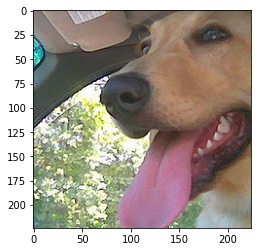

In [ ]:
print(vocab.textify(cap))
plt.imshow(denorm(img))

## Make Dataloader

In [ ]:
bs = 256

We have to define our own custon `pad_collate` function. THis function is used while making the dataloader class. It's gather up batchsized samples from the dataset, find the lenght of the larget sentence in each sample batch and then compare this lenght with the lenght of other sentences in the selected sample. For every sentence in the sample that isn't up to the max lenght in that sample, pad the sentnecne with 1s or the xxpad token till this lenght is achieved. We have the option of either padding short sentences in the sample from the right or from the left.

This is important in order to utilize the full arallel processing capability of our GPU

In [ ]:
def custom_pad_collate(samples:BatchSamples, pad_idx:int=1, pad_first:bool=True, 
                       backwards:bool=False, transpose:bool=False) -> Tuple[LongTensor, LongTensor]:
  "Function that collect samples and adds padding. Flips token order if needed"
  images, captions = zip(*samples)
  # max_len = max([len(c_)  for c in captions for c_ in c])
  max_len = max([len(c) for c in captions])
  res = torch.zeros(len(captions), max_len).long() + pad_idx
  if backwards: pad_first = not pad_first
  for i,c in enumerate(captions):
    if pad_first: res[i,-len(c):] = LongTensor(c)
    else:         res[i,:len(c):] = LongTensor(c)
  if backwards: res = res.flip(1)
  # swap the rows and columns to make it a column vector
  if transpose: res.transpose_(0, 1)
  # stack along the rows
  return torch.stack(images, 0, out=None), res

In [ ]:
custom_collate_fn = partial(custom_pad_collate, pad_first=False, transpose=True)

We have to make our FastAI samplers. We have just made the pad collator which takes samples and pads their lengths according the max lenght in theat batchsized sample. The thing is that if we just use this we may have very short sentences and very long ones in the same sample hence the short one will be padded with a lot of 1s which will lead to a waste of our computational resource. We need a way to make the samples selected by the pad_collate method are have elements of approximately the same lenght so there won't be too much padding in that sample batch. The `SortSampler` class returns indices of the sorted sentences dataset. This class defined above is very good for the validation (remeber only one batch since validation) because no learning happens. However for the training data, we don't expect realife data to come well sorted so we use the `SortishSampler` adds a bit of randomness in the by making all the sentences with approximately equal captions in every batch

In [ ]:
train_sampler = SortishSampler(train_data[1], 
                               key=lambda x: len(train_data[1][x]), bs=bs)
valid_sampler = SortSampler(valid_data[1], key=lambda x: len(valid_data[1][x]))

We can now create our custom Dataloaders with the smaplers and pad collate function

In [ ]:
train_dl = DataLoader(dataset=train_dataset, batch_size=bs, sampler=train_sampler, collate_fn=custom_collate_fn)
valid_dl = DataLoader(dataset=valid_dataset, batch_size=bs, sampler=valid_sampler, collate_fn=custom_collate_fn)

Test the dataloader

In [ ]:
images, captions = next(iter(train_dl))

xxmaj during a martial arts match , a man attempts to kick the other in the face . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad


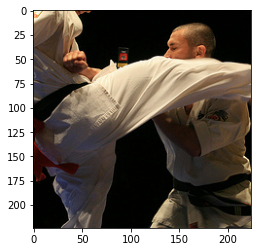

In [ ]:
idx = 21
print(vocab.textify(captions[:,idx]))
plt.imshow(denorm(images[idx]))

## Model Creation

Make the models. Show attend and tell

In [ ]:
# last layers of resnet
def fc_layer(in_, out, p=0.1):
  return nn.Sequential(
  Flatten(),
  nn.Linear(in_, out),
  nn.Dropout(p),
  )

In [ ]:
class Encoder(nn.Module):
  def __init__(self, device, attn_size, n_layers, filter_sz, num_filters):
    super().__init__()
    self.device = device
    self.filter_sz = filter_sz
    self.n_layers = n_layers

    base_model = list(models.resnet101(pretrained=True).children())[:-2] #the base of resnet101 
                                                             #has 2048 output channels
    self.base_network = nn.Sequential(*base_model)

    # make the base model frozen
    self.freeze()

    self.adap_pool = nn.AdaptiveAvgPool2d(output_size=(filter_sz, filter_sz))

    # adap maxpool concat with adap avg pool. Channel size doubles
    self.concat_pool = AdaptiveConcatPool2d(sz=1)

    # output channel from concat pool doubled. Output should be the learnt encodings from image
    self.output_layers = nn.ModuleList(fc_layer(2*num_filters, attn_size) for _ in range(n_layers))


  def forward(self, input):
    # this is what will passed into the first time step of the decoder
    embedded = self.base_network(input) #size (bs, 2048, h, w)
    embedded_out = self.concat_pool(embedded) #(bs, 2*2048, 1, 1) #concat(avg,max)
    
    # size (bs, attn_size(500)) cus of Flatten
    encoder_to_decoder_hidden = [layer(embedded_out) for layer in self.output_layers]

    # this will give the part of the image that will be attended to. This 
    # should be the size of the filter being overlayed on the image 
    focus_on_image = self.adap_pool(embedded).view(embedded.size(0), embedded.size(1), -1) #(bs, 2048, filter_sz(3), filter_sz)
    
    return torch.stack(encoder_to_decoder_hidden, dim=0), focus_on_image.transpose(1, 2)
  
  def freeze(self):
    for layer in self.base_network:
      requires_grad(layer, False)

  def unfreeze(self):
    for layer in self.base_network:
      requires_grad(layer, True)

Attention sums up the enocoded image pixels from the last encoding layer of the convnet passed into an adaptive avgpooler(to maintain size) and the previous hidden state at the present timestep of the decoder(for first time step prev hidden is the hidden from last time step of encoder) and then passes the sum throough a non linearity. The output from this passes through a linear layer(with outout size the size of the attention we desire over the image which corresponds to the max number of hidden layers for the decoder) which is then softmaxed to find out alphas/weights which tells us how much importance to allocate to the image pixels. This weights are then multiplied by the encoded image to give us our attended encoded images

In [ ]:
n_layers, attn_size = 1, 500

In [ ]:
# credit to https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Image-Captioning/blob/master/models.py
# paper: https://arxiv.org/pdf/1502.03044.pdf
class Attention(nn.Module):
  def __init__(self, num_filters, dec_hidden_dim, attn_size):
    super().__init__()
    # dec_hidden_dim is the number of hidden layers in the decoder
    self.decoder_hidden_linear = nn.Linear(dec_hidden_dim, attn_size)
    self.encoder_hidden_linear = nn.Linear(num_filters, attn_size)
    self.attn_enc_dec = nn.Linear(attn_size, 1) 
    self.softmax = nn.Softmax(dim=1)

  def forward(self, focus_on_image, encoder_to_decoder_hidden):
    # size (bs, attn_size(500))
    decoder_hidden = self.decoder_hidden_linear(encoder_to_decoder_hidden)
    # input size (bs, filter_sz, filter_sz, -1(num_filters))
    # after flatten (bs, filter_sz*filter_sz*num_filters)
    # output size (bs, filter_sz*filter_sz, att_size(500))
    encoder_hidden = self.encoder_hidden_linear(focus_on_image)

    # (bs, 1, attn_size(500)) + (bs, filter_sz*filter_sz, att_size(500))
    attn = F.relu(decoder_hidden.unsqueeze(1) + encoder_hidden) 
    attended = self.attn_enc_dec(attn).squeeze(2) #(bs, filter_sz*filter_sz)

    # pass through a softmax
    attn_weights = self.softmax(attended) #(bs, filter_sz*filter_sz)
    
    # shows the most imoprtant parts of image to attend to (bs, num_filters)
    context_img = (focus_on_image * attn_weights.unsqueeze(2)).sum(dim=1)

    return context_img, attn_weights

Let's write the Decoder

In the decoder, the input to the rnn should be the sum of the weighted attn on the encoded image(attended image encodings) and the input embeddings at that time step

In [ ]:
class Decoder(nn.Module):
  def __init__(self, device, filter_sz, num_filters, vocab_size, attn_size, 
               out_seq_len, n_layers=3, prob_teach_forcing=1, p_drop=0.3):
    super().__init__()
    self.n_layers, self.out_seq_len = n_layers, out_seq_len
    self.filter_sz = filter_sz
    self.num_filters = num_filters
    self.device = device

    # load the encoder
    self.encoder = Encoder(device, attn_size, n_layers, filter_sz, num_filters)

    # load the attention
    # dec_hidden_dim === attn_size
    self.attention = Attention(num_filters, attn_size, 500)
    
    # things for the decoder
    # make embedding for each vocab
    self.emb = nn.Embedding(vocab_size, attn_size)
    
    # the imputs are from the sum of the  attention output and the number of 
    # filters in the convnet
    self.rnn = nn.GRU((attn_size+num_filters), attn_size, num_layers=n_layers, 
                      dropout=0 if n_layers == 1 else p_drop)
    
    # dropout for output embeddings from decoder
    # set the linear layer for output from decoder
    self.out = nn.Linear(attn_size, vocab_size)
    # set the weights that will be in that linear layer
    self.out.weight.data = self.emb.weight.data
    # apply dropout to these weights iin this linear layer
    self.out_drop = nn.Dropout(p_drop)

    # the outputs from the attention need to be passed through a sigmoid non 
    # linearity so we should first pass them through linear layer that takes as 
    # inout the attn_size sized attended data and returns a 
    # num_filters(for convnet) sized channel output
    self.f_b = nn.Linear(attn_size, num_filters)

    # set the teahcer forcing
    self.prob_teach_forcing = prob_teach_forcing
    self.initializer()

  def initializer(self):
    # init the embeddings to a uniform random distribution
    self.emb.weight.data.uniform_(-0.1, 0.1)

  def encode(self, x):
    return self.encoder(x.to(self.device))
  
  def forward(self, x, y=None):
    # x is the input to the decoder and y is the actual output we expect from 
    # the decoder
    h, focus_on_image = self.encode(x)

    # initialize the first input to the decoder as 0. It's actually supposed to 
    # be the <start> token
    dec_inp = torch.zeros(h.size(1), requires_grad=False).long().to(self.device)
    res = []
    alphas = []

    # loop through all the words passed into the decoder
    for i in range(self.out_seq_len):
      dec_output, h, alpha = self.decode_step(dec_inp, h, focus_on_image)
      res.append(dec_output)
      alphas.append(alpha)

      # if the decoder input is one all through or if the current i(idx) is 
      # greater than the total vocab
      if (dec_inp == 1).all() or (y is not None and i >= len(y)):
        break

      # applying teaacher forcing
      elif y is not None and self.prob_teacher_forcing > 0 and (random.random() < self.prob_teach_forcing):
        dec_inp = y[i].to(self.device)

      else: 
        # get the max output from the decoder and use it as the next decoder inupt
        dec_inp = dec_output.data.max(1)[1]

    return torch.stack(res), torch.stack(alphas)

  def decode_step(self, dec_inp, h, focus_on_image):
    # we need the last encoder hidden state which is what enters the decoder
    context_image, attn_weights = self.attention(focus_on_image, h[-1])
    
    # use a sigmoid to flatten out attn weights which are less than 0.5
    beta = torch.sigmoid(self.f_b(h[-1]))

    # multiply the focus on the image by the sigmoid output to know what part 
    # of the image is important
    context_vec = beta * context_image

    # embed the vocab input to the decoder
    emb_inp = self.emb(dec_inp).unsqueeze(0)

    # start the decoder compute using the attended image and the input to 
    # hidden at present time step as input
    output, h = self.rnn(torch.cat([emb_inp, context_vec.unsqueeze(0)], dim=2), h)
    
    output = self.out(self.out_drop(output[0]))

    return F.log_softmax(output, dim=1), h, attn_weights

In [ ]:
gpu = torch.device('cuda:0')

Use a callback to apply teacher forcing on the learner model. This is to helpin training becuase we'll be showing the next hidden step of the decoder the actual input to use instead of takeing outputs from the previous hidden state as input

In [ ]:
@dataclass
class TeacherForcingCallback(Callback):
  def __init__(self, learn, decay_epochs=45):
    super().__init__()
    self.learn = learn
    self.decay_iterations = decay_epochs * len(self.learn.data.train_ds) // self.learn.data.batch_size

  def on_batch_begin(self, iteration, **kwargs):
    slef.learn.model.prob_teach_forcing = (self.decay_iterations-iteration) * 1/self.decay_iterations if iteration < self.decay_iterations else 0

Build the loss functions for the captions generated

In [ ]:
import pdb

In [ ]:
def ImageCaptionLoss(pred, target, lamb=1):
  pred, alphas = pred
  seqlen, bs = target.size()
  seqlen_pred, bs_pred, n_probs = pred.size()

  # we need to pad if target seqlen is larger than prediction seqlen
  if seqlen > seqlen_pred:
    pred = F.pad(pred, (0,0,0,0,0,seqlen-seqlen_pred))

  # but we only compare until the seqlen of the target
  pred = pred[:seqlen]
  
  # cross_entropy can't handle rank 3 tensors currently, we need to flatten
  loss = F.nll_loss(pred.contiguous().view(-1, n_probs), target.contiguous().view(-1))
  
  # See section 4.2.1 "Doubly stocastic attention"
  penalty = ((1. - alphas.sum(0)) ** 2.).mean()
  # ((1. - alphas.sum(0)) ** 2.).sum(1).mean()

  return loss + lamb * penalty

In [ ]:
pa = torch.rand((1, 2, 4))
pa

tensor([[[0.5367, 0.4410, 0.7593, 0.9947],
         [0.7995, 0.5465, 0.9269, 0.9734]]])

In [ ]:
F.pad(pa, (0,3))

tensor([[[0.5367, 0.4410, 0.7593, 0.9947, 0.0000, 0.0000, 0.0000],
         [0.7995, 0.5465, 0.9269, 0.9734, 0.0000, 0.0000, 0.0000]]])

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

class BleuMetric(Callback):
    def on_epoch_begin(self, **kwargs):
        self.references = list()
        self.candidates = list()
        
    def on_batch_end(self, last_output, last_target, **kwargs):
        #pdb.set_trace()
        num_sentences = last_output[0].size(1)
        cands = last_output[0].data.max(2)[1].transpose(1,0).chunk(num_sentences, 0)
        refs = last_target.transpose(1,0).chunk(num_sentences, 0)
        
        self.candidates.extend([[tok for tok in c[0].cpu().numpy() if tok != 1] for c in cands])
        self.references.extend([[[tok for tok in r[0].cpu().numpy() if tok != 1]] for r in refs])
        
    def on_epoch_end(self, last_metrics, **kwargs):
        #pdb.set_trace()
        assert len(self.references) == len(self.candidates)
        return add_metrics(last_metrics, corpus_bleu(self.references, self.candidates))

In [ ]:
gc.collect()

5

In [ ]:
decoder = Decoder(gpu, 7, 2048, len(vocab.itos), attn_size, 50, n_layers, p_drop=0.2)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [ ]:
dataBunch = DataBunch(train_dl=train_dl, valid_dl=valid_dl, device=gpu, path=colab_image_path, collate_fn=custom_collate_fn)

('xxmaj there is a girl with pigtails sitting in front of a rainbow painting . xxpad',
 <matplotlib.image.AxesImage at 0x7febaf782438>)

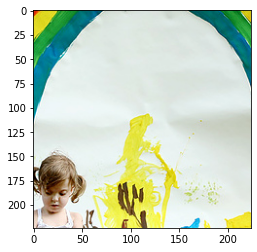

In [ ]:
vocab.textify(dataBunch.train_ds[2][1]), plt.imshow(denorm(dataBunch.train_ds[2][0]))

In [ ]:
learn = Learner(data=dataBunch, model=to_device(decoder, gpu), opt_func=opt_fn, loss_func=ImageCaptionLoss, callback_fns=[ShowGraph])#, metrics=[BleuMetric()]) # , BnFreeze

In [ ]:
learn.lr_find()

Min numerical gradient: 1.45E-05
Min loss divided by 10: 1.00E-04


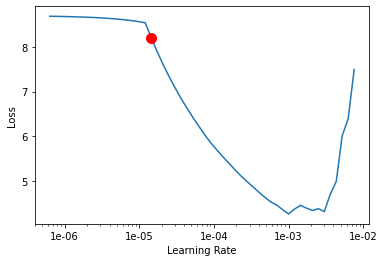

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
from fastai.callbacks import *

In [ ]:
gc.collect()

391

epoch,train_loss,valid_loss,time
0,5.079360,2.364821,01:12
1,3.829345,2.940585,01:06
2,3.421896,2.746021,01:08
3,3.191824,2.553143,01:08


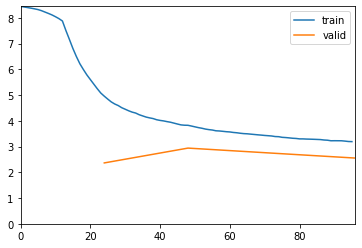

In [ ]:
learn.fit_one_cycle(4, 1e-4)

In [ ]:
learn.save('good_model')

In [ ]:
learn.load('good_model')

In [ ]:
model_path/'models'

PosixPath('/content/gdrive/My Drive/Image_Captioning/models/models')

In [ ]:
! cp '/content/Flickr8k_Dataset/Flicker8k_Dataset/models/good_model.pth' '/content/gdrive/My Drive/Image_Captioning/models/models'

In [ ]:
learn.model.encoder.unfreeze()

In [ ]:
gc.collect()

0

In [ ]:
# learn.lr_find()
# gc.collect()
# learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,time
0,1.412058,1.161886,01:59
1,1.331722,1.158544,01:58
2,1.276465,1.140054,01:58
3,1.251552,1.171516,02:04
4,1.220903,1.159151,02:02
5,1.197832,1.097760,02:02
6,1.192591,1.099555,02:01
7,1.176488,1.139889,02:00
8,1.163322,1.133899,02:01
9,1.158452,1.089782,02:01


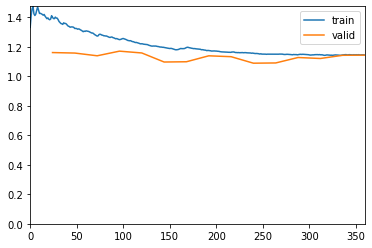

AttributeError: ignored

In [ ]:
learn.fit_one_cycle(15, 3e-04)

In [ ]:
learn.fit_one_cycle(3, 3e-4, 
            callbacks=[
                      # SaveModelCallback(learn, monitor='bleu_metric'), 
                       CSVLogger(learn, filename='train_img_cap_gen')
                                     ])

In [ ]:
(model_path/'models').ls()

[PosixPath('/content/gdrive/My Drive/Image_Captioning/models/models/bestmodel.pth')]

In [ ]:
learn.save('Best_model', return_path=True)

PosixPath('/content/Flickr8k_Dataset/Flicker8k_Dataset/models/Best_model.pth')

In [ ]:
!cp '/content/Flickr8k_Dataset/Flicker8k_Dataset/models/bestmodel.pth' '/content/gdrive/My Drive/Image_Captioning/models/models/'

In [ ]:
learn.load('bestmodel')

In [ ]:
learn.model.encoder.unfreeze()

## Test using Beam search

In [ ]:
learn.model.eval()

Decoder(
  (encoder): Encoder(
    (base_network): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
     

In [ ]:
class HypothesisNode():
    """ Hypothesis Node class for performing Beam Search """
    def __init__(self, sequence, log_prob, hidden_state, alphas):
        """HypothesisNode constructur
        
        Args:
          sequence: A sequence of tokens
          log_prob: The log of the probability of this sequence
          hidden_state: The hidden state of the Decoder RNN after decoding the last token in the sequence
        """
        self._seq = sequence
        self._alphas = alphas
        self._log_prob = log_prob
        self._h = hidden_state
    
    @property
    def last_tok(self):
        """
        Returns:
          The last token in the sequence
        """
        return self._seq[-1]
        
    def update(self, tok, log_prob, new_h, new_alpha):
        """
        Updates the sequence with a new token and returns a new Hypothesis Node
        Args:
          tok: The new token that is appended to the sequence
          log_prob: The log of the probability ot this token
          new_h: The new hidden state of the Decoder RNN after this token
        
        Returns:
          An Hypothesis Node with the updated sequence, log probability and hidden state
        """
        return HypothesisNode(self._seq + [tok], self._log_prob + log_prob, new_h, self._alphas + new_alpha)
    
    def __str__(self):
        return ('Hyp(log_p = %4f,\t seq = %s)' % (self._log_prob, vocab.textify([t.item()for t in self._seq])))


In [ ]:
class BeamSearch():
    """ Performs BeamSearch for seq2seq decoding or Image captioning """
    def __init__(self, enc_model, dec_model, beam_width=5, num_results=1, max_len=30, device=torch.device('cuda:0')):
        """BeamSearch object constructor
        Args:
          enc_model: A seq2seq encoder or cnn for image captioning
          dec_model: A RNN decoder model
          beam_width: int, the number of hypotheses to remember in each iteration
          max_len: int, the longest possible sequence
        """
        self._device = device
        self._enc_model = enc_model
        self._dec_model = dec_model
        self._beam_width = beam_width
        self._num_results = num_results
        self._max_len = max_len
        self._start_tok = 0
        self._end_tok   = 1
        self._annotation_vecs = None
        
    def __call__(self, img, verbose=False):
        """Performs the Beam search
        Args:
          img: the image to be annotated, torch tensor with 3 color channels
          verbose: bool, allows printing the intermediate hypotheses for better understanding
        
        Returns:
          The 'beam_width' most probable sentences
        """
        img = img.unsqueeze(0)
        h, annotation_vecs = self._enc_model(img)
        self._annotation_vecs = annotation_vecs
        
        hyps = [HypothesisNode([torch.zeros(1, requires_grad=False).long().to(self._device)], 0, h, [])]
        results = []
        
        step = 0
        width = self._beam_width
        while width > 0 and step < self._max_len:
            if verbose: print("\n Step: ",step)
            new_hyps = []
            for h in hyps:
                new_hyps.extend(self.get_next_hypotheses(h, width))
            
            new_hyps = sorted(new_hyps, key= lambda x: x._log_prob, reverse=True)
            if verbose: self.print_hypotheses(new_hyps, "Before narrowing:")
                
            hyps = []
            for h in new_hyps[:width]:
                if h.last_tok == self._end_tok:
                    results.append(h)
                    width = width - 1
                else:
                    hyps.append(h)
            
            if verbose: 
                self.print_hypotheses(hyps, "After narrowing:")
                self.print_hypotheses(results, "Results:")
                
            step += 1
         
        results.extend(hyps[:width])
        results = sorted(results, key=lambda x: x._log_prob/len(x._seq), reverse=True)
        
        if verbose: self.print_hypotheses(results, "Final:")
        
        if self._num_results == 1:
            return ([t.item() for t in results[0]._seq[1:-1]], torch.stack(results[0]._alphas))
        else:
            return [([t.item() for t in r._seq[1:-1]], torch.stack(r._alphas)) for r in results[:self._num_results]]
        
    def get_next_hypotheses(self, hyp, k):
        """Calculates the next 'beam_width' hypotheses given a Hypothesis Node
        Args:
          hyp: an Hypothesis Node containing a sequence, a log probability and a Decoder RNN hidden state
          k: the number of hypotheses to calculate
        Returns:
          A list with the 'beam_width' most probable sequences/Hypothesis Nodes
        """

        dec_outp, h, alphas = self._dec_model(hyp.last_tok, hyp._h, self._annotation_vecs)

        top_k_log_probs, top_k_toks = dec_outp.topk(k, dim=1)

        return [hyp.update(top_k_toks[0][i].unsqueeze(0), top_k_log_probs[0][i], h, list(alphas)) for i in range(k)]
    
    def print_hypotheses(self, hyps, description):
        print(description)
        for h in hyps:
            print(h)

In [ ]:
# from scipy.misc import imresize
from scipy.ndimage.filters import gaussian_filter
from matplotlib.patheffects import Stroke, Normal
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# the functions fig2data and fig2img are taken from 
# http://www.icare.univ-lille1.fr/tutorials/convert_a_matplotlib_figure
# Deprecation errors have been fixed

def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

def fig2img ( fig ):
    """
    @brief Convert a Matplotlib figure to a PIL Image in RGBA format and return it
    @param fig a matplotlib figure
    @return a Python Imaging Library ( PIL ) image
    """
    # put the figure pixmap into a numpy array
    buf = fig2data ( fig )
    w, h, d = buf.shape
    return Image.frombytes( "RGBA", ( w ,h ), buf.tostring( ) )
    
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt, verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

def draw_outline(matplt_plot_obj, lw):
    matplt_plot_obj.set_path_effects([Stroke(linewidth=lw, foreground='black'), Normal()])

def show_img(im, figsize=None, ax=None, alpha=1, cmap=None):
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha, cmap=cmap)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

def visualize_attention(im, pred, alphas, denorm, vocab, att_size=7, thresh=0., sz=224, return_fig_as_PIL_image=False):
    cap_len = len(pred)
    alphas = alphas.view(-1,1,  att_size, att_size).cpu().data.numpy()
    alphas = np.maximum(thresh, alphas)
    alphas -= alphas.min()
    alphas /= alphas.max()
 
    figure, axes = plt.subplots(cap_len//5 + 1,5, figsize=(12,8))
 
    for i, ax in enumerate(axes.flat):
        if i <= cap_len:
            ax = show_img(denorm(im), ax=ax)
            if i > 0:
                mask = np.array(Image.fromarray(alphas[i - 1,0]).resize((sz,sz)))
                blurred_mask = gaussian_filter(mask, sigma=8)
                show_img(blurred_mask, ax=ax, alpha=0.5, cmap='afmhot')
                draw_text(ax, (0,0), vocab.itos[pred[i - 1]])
        else:
            ax.axis('off')
    plt.tight_layout()

    if return_fig_as_PIL_image:
        return fig2img(figure)

In [ ]:
beam_width = 5

In [ ]:
beam_search = BeamSearch(learn.model.encode, learn.model.decode_step, beam_width)
preds = list()
references = list()

for i, (im, ref_caps) in enumerate(zip(*test_data)):
  im = valid_tfms(Image.open(im).convert('RGB'))
  pred, _ = beam_search(im)
  
  preds.append(pred)
  references.append([r for r in ref_caps])
  
  if i % 500 == 0:
    print('{0}/{1}'.format(i, len(data[0])))

print('Total Bleu score for a beam width of {0}: {score}'.format(beam_width, score=100 * corpus_bleu(references, preds)))

0/40460
500/40460
Total Bleu score for a beam width of 5: 1.7005248450901893


a two in in a a a a


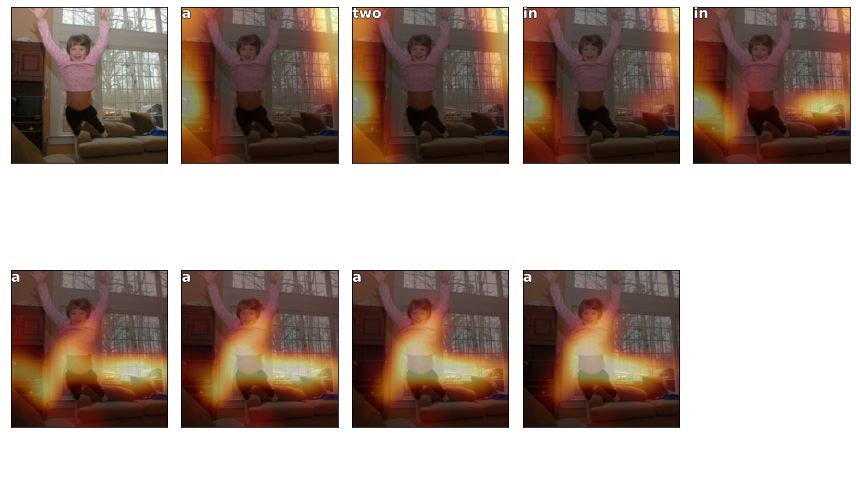

In [ ]:

im = learn.data.valid_ds[random.randint(0, 1000)][0]
results = beam_search(im)
print(vocab.textify(results[0]))
visualize_attention(im, results[0], results[1], denorm, vocab, att_size=7, sz=sz, thresh=0.02)